# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.1


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2006036
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [62 59 62 71 66 41 65 58 66 50]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [62 59 62 71 66 41 65 58 66 50]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


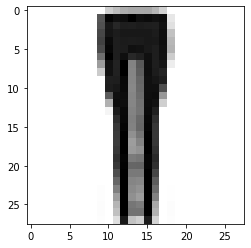

LABEL: 1
INPUT:


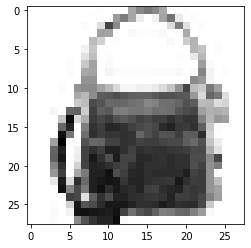

LABEL: 8
INPUT:


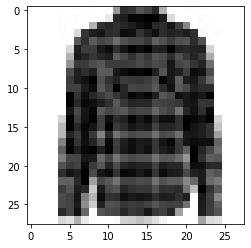

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(5,5,5), (45,45), (45,), (50,), (50,50,50) ]}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

gridsearch = GridSearchCV(mlp, param_grid = parameters, refit = True, cv = 5)
gridsearch.fit(X_train, y_train)
gridsearch.predict(X_test)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(gridsearch.best_params_)
print("Score with best parameters:")
print(gridsearch.best_score_)

print("\nAll scores on the grid:")
results = gridsearch.cv_results_
#print(results)
for i in range(5):
    print(results['params'][i], results['mean_test_score'][i])

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (45,)}
Score with best parameters:
0.8

All scores on the grid:
{'hidden_layer_sizes': (5, 5, 5)} 0.33833333333333326
{'hidden_layer_sizes': (45, 45)} 0.7683333333333333
{'hidden_layer_sizes': (45,)} 0.8
{'hidden_layer_sizes': (50,)} 0.7933333333333333
{'hidden_layer_sizes': (50, 50, 50)} 0.695


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 105, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp = MLPClassifier(hidden_layer_sizes = (45,), max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

gridsearch = GridSearchCV(mlp, param_grid = parameters, refit = True, cv = kf)
gridsearch.fit(X_train, y_train)
gridsearch.predict(X_test)
# recall to use cv=kf to use the k-fold subdivision seen in the lectures

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(gridsearch.best_params_)
print("Score with best parameters:")
print(gridsearch.best_score_)

print("\nAll scores on the grid:")
results = gridsearch.cv_results_
#print(results)
for i in range(3):
    print(results['params'][i], results['mean_test_score'][i])

RESULTS FOR NN

Best parameters set found:
{'batch_size': 480}
Score with best parameters:
0.7933333333333332

All scores on the grid:
{'batch_size': 1} 0.12166666666666667
{'batch_size': 105} 0.7799999999999999
{'batch_size': 480} 0.7933333333333332


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

The most effective number of layers is one layer of size 45. When you increase the number of layers, the score reduces. The score also reduces if smaller sizes are used in the layers. 
The best batch size is with a high batch size. Baseline SGD (batch size = 1) returns a very low score, 0.1 ish, and standard GD with batch size = 480 returns a higher score, almost 0.8. In between, above 50 it has a score very similar to standard GD.

### TO DO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...


C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 1.43 sec

Training MLP of size (20,) ...
Done, training time: 0.72 sec

Training MLP of size (30,) ...
Done, training time: 1.31 sec

Training MLP of size (30, 20) ...
Done, training time: 0.68 sec

Training MLP of size (30, 30, 20) ...
Done, training time: 0.66 sec



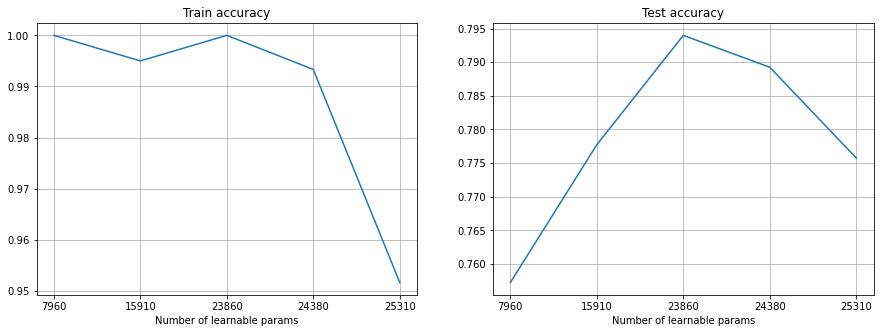

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (30,20,), (30,30,20)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    
    mlp = MLPClassifier(hidden_layer_sizes = hl_size, batch_size = 480, max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

The best testing accuracy is for 23860 learnable parameters. Before this value, the accuracy is lower, and after it also decreases. Previously, there are not enough parameters for a max test accuracy, and after, the data is poorly fit. This is because a more complex model will overfit to training data if there is not a large enough amount of samples in it. Overfitting results in a very high train accuracy and a lower test accuracy. 

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

In [12]:
lr_list = [0.001, 0.01, 0.1]

parameters = {'learning_rate_init': lr_list}

mlp = MLPClassifier(hidden_layer_sizes = (30,), batch_size = 480, max_iter=600, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID)

gridsearch = GridSearchCV(mlp, param_grid = parameters, refit = True, cv = kf)
gridsearch.fit(X_train, y_train)
gridsearch.predict(X_test)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(gridsearch.best_params_)
print("Score with best parameters:")
print(gridsearch.best_score_)

print("\nAll scores on the grid:")
results = gridsearch.cv_results_
#print(results)
for i in range(3):
    print(results['params'][i], results['mean_test_score'][i])

C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warning

RESULTS FOR NN

Best parameters set found:
{'learning_rate_init': 0.1}
Score with best parameters:
0.7899999999999999

All scores on the grid:
{'learning_rate_init': 0.001} 0.7416666666666666
{'learning_rate_init': 0.01} 0.7833333333333332
{'learning_rate_init': 0.1} 0.7899999999999999


C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


for learning rate equal to 0.001 score is 0.776
for learning rate equal to 0.01 score is 0.7865
for learning rate equal to 0.1 score is 0.794
RESULTS FOR NN

{0.001: 0.776, 0.01: 0.7865, 0.1: 0.794}
Best parameters set found:
0.1
Score with best parameters:
0.794


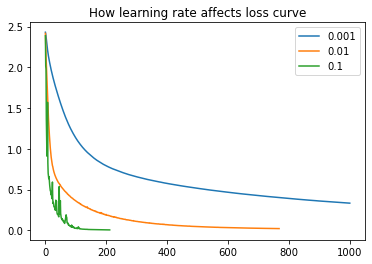

In [13]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.001, 0.01, 0.1]
#lr_list = [10**exp for exp in range(-3,0)]
scores = {}

for i in lr_list:
    mlp = MLPClassifier(hidden_layer_sizes = (30,), batch_size = 480, learning_rate_init = i, max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID)
    mlp.fit(X_train, y_train)
    mlp.predict(X_test)
    print('for learning rate equal to', i, 'score is', mlp.score(X_test, y_test))
    scores.update({i: mlp.score(X_test, y_test)})
    plt.plot(mlp.loss_curve_, label = i)
    plt.legend()
    plt.title('How learning rate affects loss curve')


print ('RESULTS FOR NN\n')
print(scores)
print("Best parameters set found:")
print(0.1)
print("Score with best parameters:")
print(scores.get(0.1))

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence?

The algorithm does not converge within 600 iterations for lr = 0.01 or 0.001.
As the learning rate increases, the stability of the curve decreases but the speed of convergence increases. For lr = 0.1, the curve converges by 200 iterations, however neither of the other two learning rates have converged by 600. 0.01 converges by 800 iterations. A larger learning rate is therefore preferable. 

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.206000


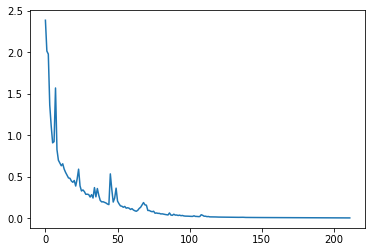

In [14]:
#get training and test error for the best NN model from CV

best_mlp = MLPClassifier(hidden_layer_sizes = (30,), batch_size = 480, learning_rate_init = 0.1, max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID)
best_mlp.fit(X_train, y_train)
training_score = best_mlp.score(X_train, y_train)

a = best_mlp.predict(X_test)
test_score = best_mlp.score(X_test, y_test)

test_error = 1-test_score
training_error = 1-training_score
print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(best_mlp.loss_curve_)

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [397 413 426 391 382 385 387 374 423 422]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [16]:
# use best architecture and params from before
large_mlp = MLPClassifier(hidden_layer_sizes = (30,), batch_size = 480, 
                         learning_rate_init = 0.1, max_iter=300, alpha=1e-4, solver='sgd', 
                         tol=1e-4, random_state=ID)#, verbose = True)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

large_mlp.fit(X_train, y_train)
training_score = large_mlp.score(X_train, y_train)

b = large_mlp.predict(X_test)
test_score = large_mlp.score(X_test, y_test)

test_error = 1-test_score
training_error = 1-training_score

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)



RESULTS FOR NN

NN training error: 0.000000
NN test error: 0.170375


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

600 data points: (300 iterations)
Best NN training error: 0.000000
Best NN test error: 0.206000

4000 data points: (50 iterations)
NN training error: 0.123500
NN test error: 0.210911
(300 iterations)
NN training error: 0.081500
NN test error: 0.192304

This shows that increases the number of samples doesn't dramatically improve the results even on the same number of iterations, however it does take more time computationally. One would think that increases the number of training samples to train the model would result in a better model but that isn't always the case, depending on how the data has been split up.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

[5 9 2 ... 8 6 0]
[4 8 4 ... 4 6 2]
56000
3112
NN_prediction 8
large_NN_prediction 5
INPUT:


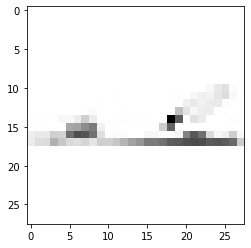

LABEL: 5


In [17]:
NN_prediction = a
print(a)
large_NN_prediction = b
print(b)
print(len(y_test))
missclassified_sample_index = []
for i in range(len(a)):
    if a[i] != y_test[i] & b[i] == y_test[i]:
        missclassified_sample_index.append(i)
print(len(missclassified_sample_index))
xx = missclassified_sample_index[3]
print("NN_prediction", a[xx])
print("large_NN_prediction", b[xx])
plot_input(X_test,y_test,xx)

### TO DO 8

Let's plot the weights of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


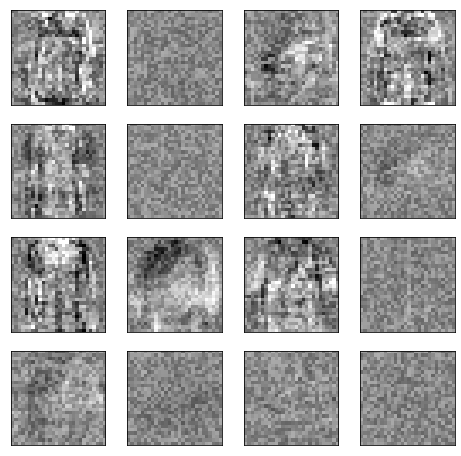

Weights with 4000 data points:


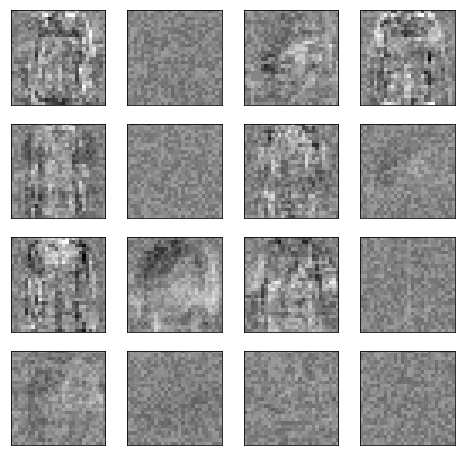

In [23]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
vmin, vmax = best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
vmin, vmax = large_mlp.coefs_[0].min(), large_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

The weights for 4000 data points show more uniform images. There are less extremes in the values. This means the weights for the neurons are more similar. For the 600 data points, the weights are less uniform, showing them to be more different between neurons.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [24]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(C = 50, kernel = 'rbf', gamma=0.005)
best_SVM.fit(X_train, y_train)
test_score = best_SVM.score(X_test, y_test)
training_score = best_SVM.score(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error =  1-training_score

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1-test_score
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0043999999999999595
Test score SVM:
0.16159999999999997


In [25]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1)

# you can re-use your code from Lab 2
regL2.fit(X_train, y_train)
a = regL2.predict(X_train)
train_err = 0
for i in range(len(a)):
    if a[i] != y_train[i]:
        train_err += 1
error_rate_training = train_err/len(y_train)
#print(error_rate_training)
training_error = np.sum(a != y_train)/len(y_train)
b = regL2.predict(X_test)
test_err = 0
for i in range(len(b)):
    if b[i] != y_test[i]:
        test_err += 1
test_error = test_err/len(y_test)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')


print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.067200
Test error (reg): 0.192400


C:\Users\chels\OneDrive\Documents\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.067200
Test error (reg): 0.192400
    
RESULTS FOR SVM
Training score SVM: 0.0043999999999999595
Test score SVM: 0.16159999999999997
    
RESULTS FOR LARGE NN

NN training error: 0.081500
NN test error: 0.192304
    
All results are similar however SVM performs marginally better than NN and LR. 
